In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.special import erf

from matplotlib import rc
%config InlineBackend.figure_format = 'retina'
rc('savefig', dpi = 300)
rc('figure', dpi = 100)


def format_plot(xlabel, ylabel, title, width=6, height=4, grid='on', despine=10):
    f = plt.gcf()
    f.set_size_inches(width,height)
    ax = plt.gca()
    sns.despine(offset=despine)
    plt.grid(grid)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, loc='left', fontweight='bold')
    
    leg = ax.get_legend()
    if leg is not None:
        leg.get_frame().set_linewidth(0.0)
        leg.get_frame().set_alpha(0.5)

    plt.tight_layout()

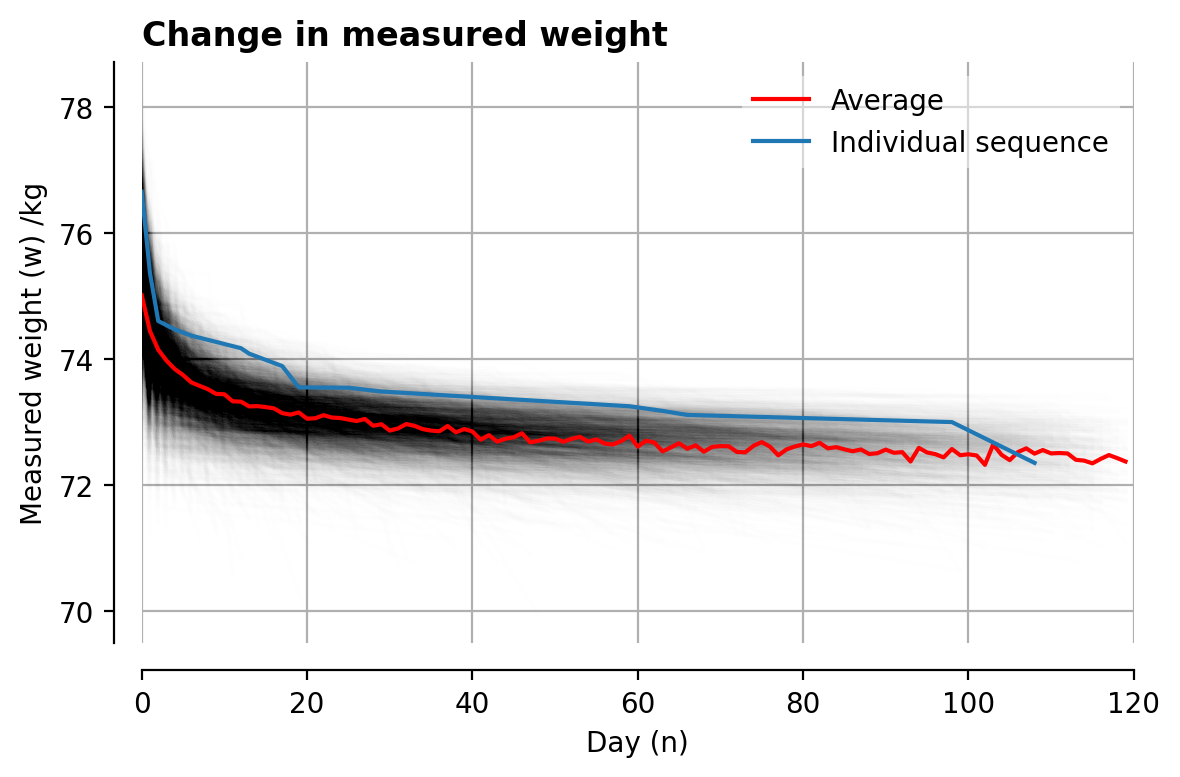

In [4]:
mu = 75
sig = 1
attempts = 5000
max_days = 120

by_day = [[] for d in range(max_days)]

longest_run = 0
longest_run_days = []
longest_run_weights = []

for i in range(attempts):
    last_weight = np.random.normal(mu, sig, 1)
    days = [0]
    weights = [last_weight]
    by_day[0].append(last_weight)
    for day in range(1, max_days):
        this_weight = np.random.normal(mu, sig, 1)
        if this_weight < last_weight:
            days.append(day)
            weights.append(this_weight)
            last_weight = this_weight
            by_day[day].append(this_weight)

    if len(days) > longest_run:
        longest_run_days = days
        longest_run_weights = weights
        longest_run = len(days)

    plt.plot(days, weights, c='black', alpha = 0.005)

by_day_av = np.zeros((max_days, 1))
for day in range(max_days):
    by_day_av[day] = np.mean(by_day[day])

plt.plot(range(max_days), by_day_av, c='red', label = 'Average')
plt.plot(longest_run_days, longest_run_weights, label='Individual sequence')
plt.xlim([0, max_days])
plt.legend()

format_plot('Day (n)', 'Measured weight (w) /kg', 'Change in measured weight')


plt.show()

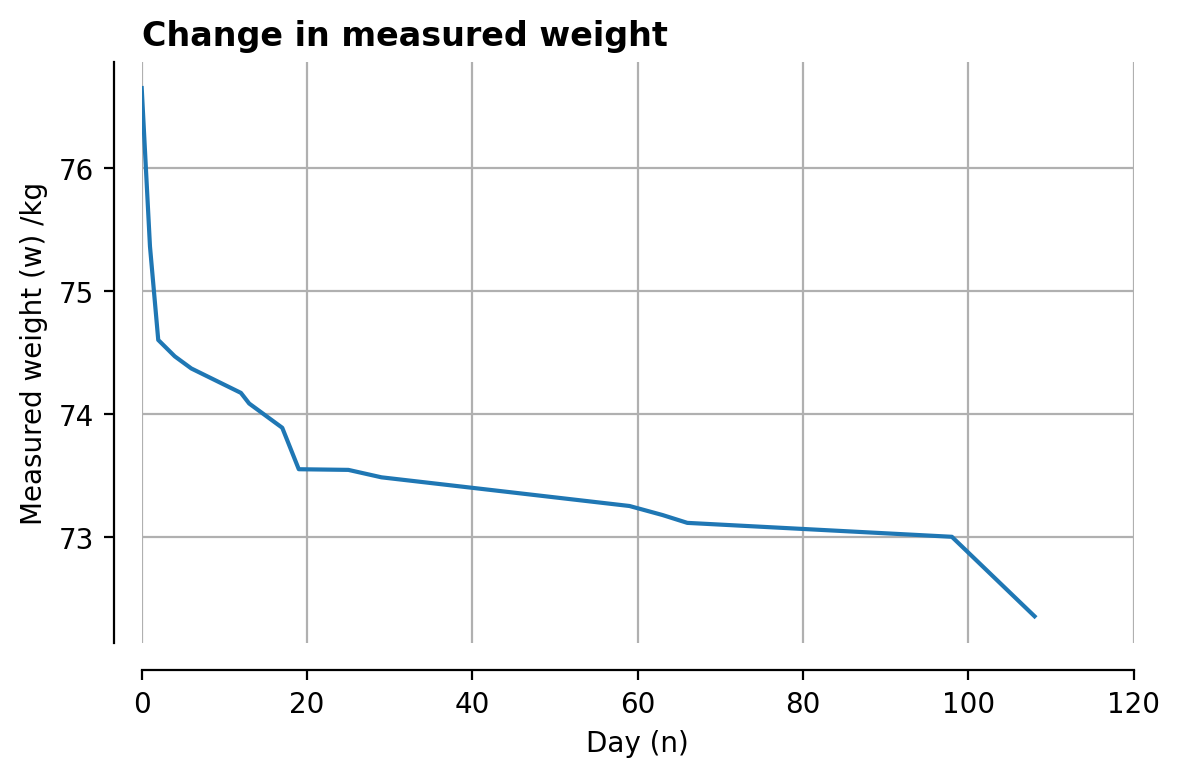

In [5]:
plt.plot(longest_run_days, longest_run_weights, label='Individual sequence')
plt.xlim([0, max_days])

format_plot('Day (n)', 'Measured weight (w) /kg', 'Change in measured weight')


plt.show()

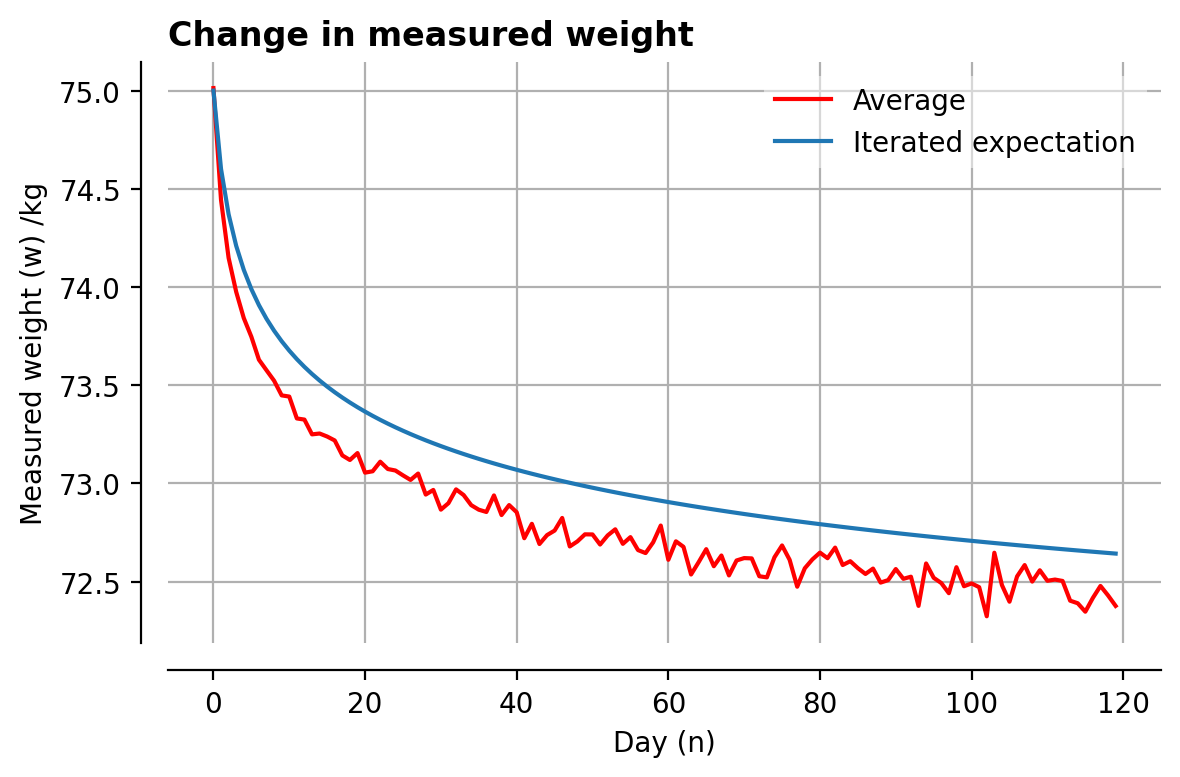

In [7]:
def expected(w0):
    x = (w0 - mu) / (np.sqrt(2) * sig)
    return 0.5 * (-sig * np.sqrt(2 / np.pi) * np.exp(-x**2) + mu + w0 + (mu - w0) * erf(x))

x = [day for day in range(max_days)]
y = [mu for i in range(max_days)]
for i in range(len(x)):
    if i > 0:
        y[i] = expected(y[i-1])

plt.plot(range(max_days), by_day_av, c='red', label = 'Average')
plt.plot(x, y, label = 'Iterated expectation')
plt.legend()

format_plot('Day (n)', 'Measured weight (w) /kg', 'Change in measured weight')

plt.show()


C:\Users\jasmc\AppData\Local\Temp\ipykernel_23960\1354853852.py:22: RuntimeWarning: invalid value encountered in double_scalars
  Ews[j] = sum / denom
C:\Users\jasmc\AppData\Local\Temp\ipykernel_23960\1354853852.py:24: RuntimeWarning: invalid value encountered in double_scalars
  NPws[i][j] = Pws[i][j] / denom


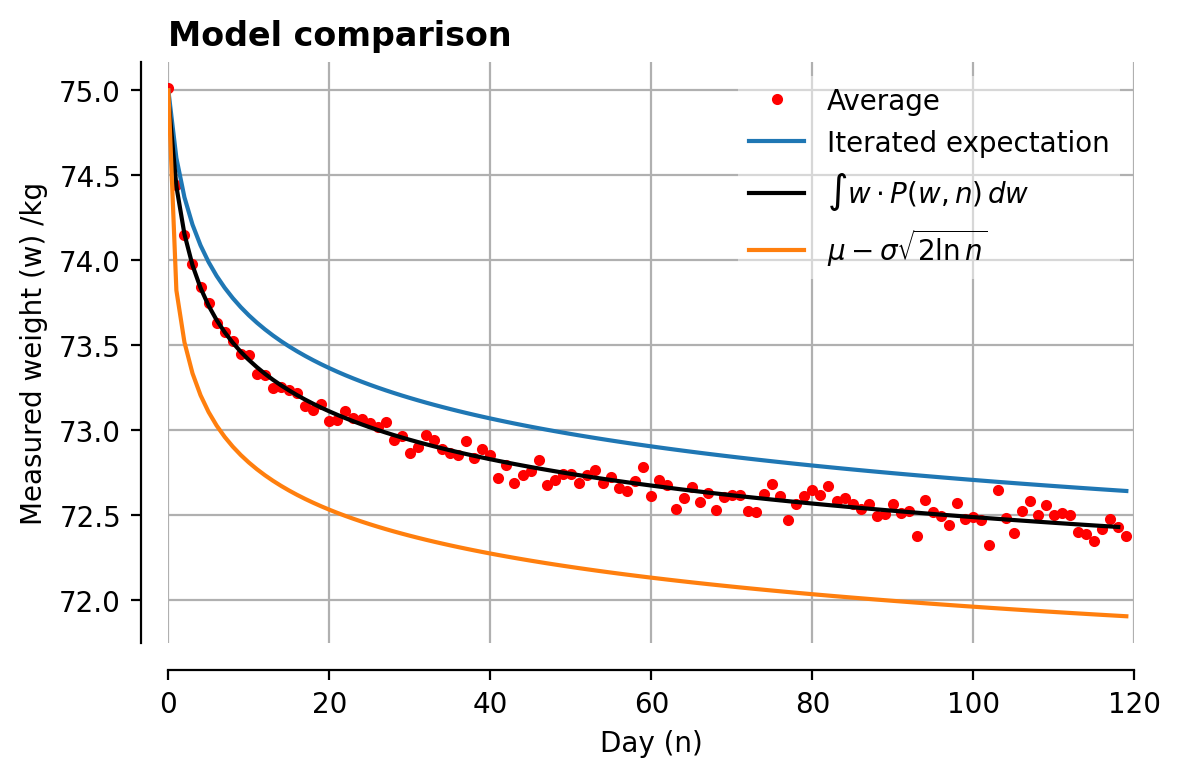

In [25]:
def expected2(w, n):
    x = (w - mu) / (np.sqrt(2) * sig)
    return n * (0.5 * (1 - erf(x)))** (n-1) * 1 / np.sqrt(2 * np.pi * sig**2) * np.exp(-x**2)

n_axis = np.linspace(0, max_days - 1, max_days)
w_axis = np.linspace(70, 77, 100)

Pws = np.zeros((len(w_axis), len(n_axis)))
NPws = np.zeros((len(w_axis), len(n_axis)))

for i, w in enumerate(w_axis):
    for j, n in enumerate(n_axis):
        Pws[i][j] = expected2(w, n)

Ews = np.zeros((len(n_axis), 1))
for j, n in enumerate(n_axis):
    sum = 0
    denom = 0
    for i, w in enumerate(w_axis):
        sum += w_axis[i] * Pws[i][j]
        denom += Pws[i][j]
    Ews[j] = sum / denom
    for i in range(len(w_axis)):
        NPws[i][j] = Pws[i][j] / denom

approx = mu - sig * np.sqrt(2 * np.log(n_axis + 1))

plt.plot(n_axis, by_day_av, '.', c='red', label = 'Average')
plt.plot(n_axis, y, label = 'Iterated expectation')
plt.plot(n_axis - 1, Ews, c='black', label = '$\int w \cdot P(w, n) \, dw$')
plt.plot(n_axis, approx, label = '$\mu - \sigma\sqrt{2\ln{n}}$')
plt.legend()

plt.xlim([0, 120])

format_plot('Day (n)', 'Measured weight (w) /kg', 'Model comparison')

plt.show()

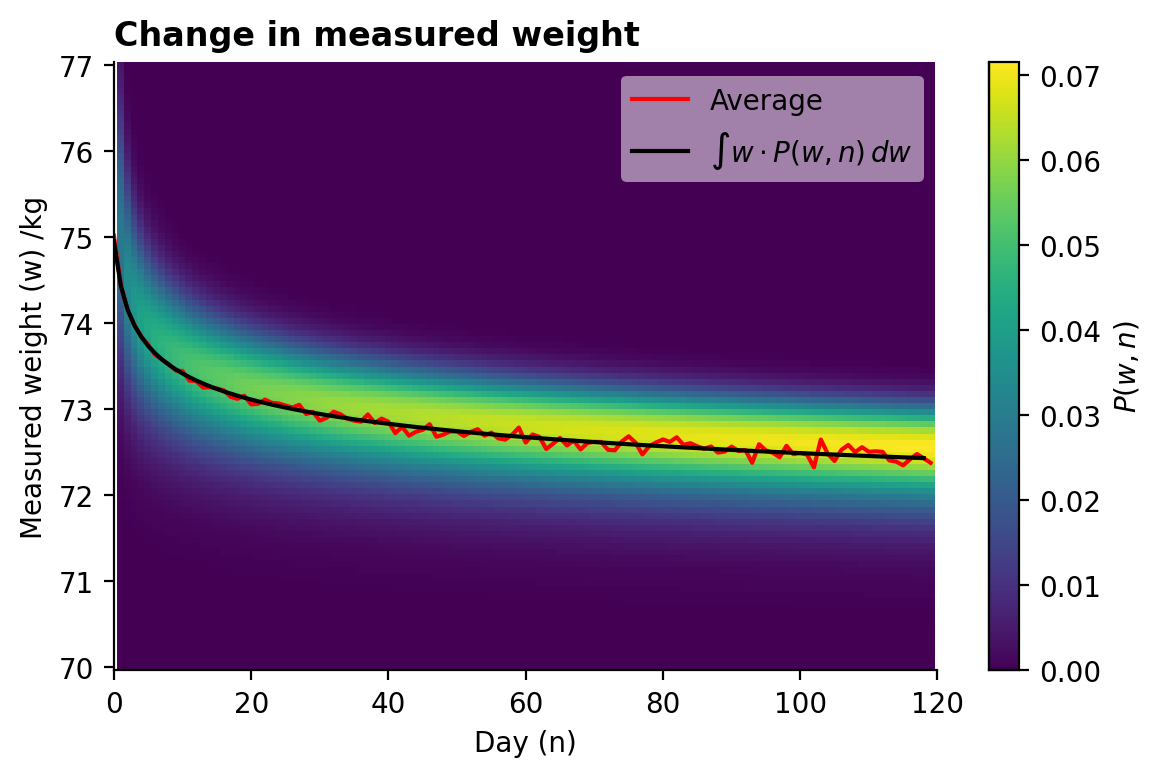

In [24]:
plt.pcolor(n_axis, w_axis, NPws)
plt.plot(n_axis, by_day_av, c='red', label = 'Average')
plt.plot(n_axis-1, Ews, c='black', label = '$\int w \cdot P(w, n) \, dw$')
plt.colorbar(label='$P(w, n)$')
plt.legend()

plt.xlim([0, 120])

format_plot('Day (n)', 'Measured weight (w) /kg', 'Change in measured weight', width=6, grid=False, despine=0)

plt.show()

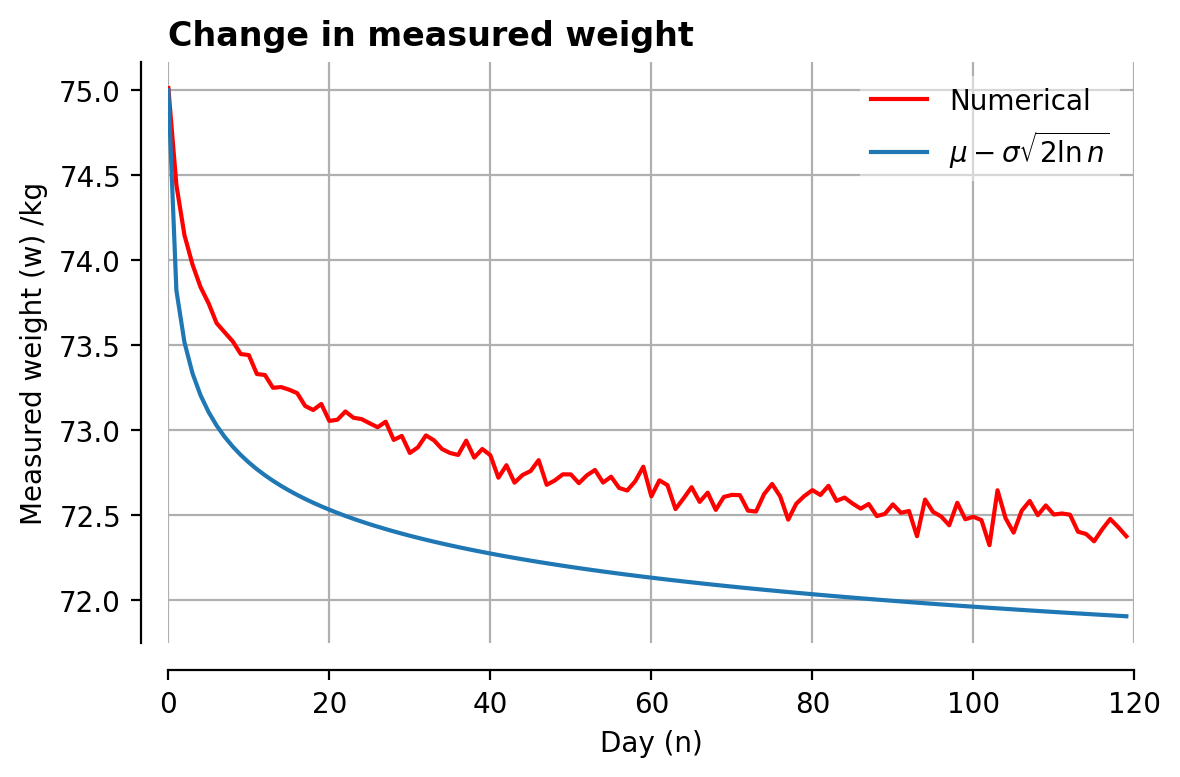

In [14]:
plt.plot(n_axis, by_day_av, c='red', label = 'Numerical')
plt.plot(n_axis, approx, label = '$\mu - \sigma\sqrt{2\ln{n}}$')
plt.legend()

plt.xlim([0, 120])

format_plot('Day (n)', 'Measured weight (w) /kg', 'Change in measured weight')

plt.show()

In [28]:
np.sqrt(2 * np.log(90))

2.9999365561059004